In [5]:
import xarray as xr
from pcv.process import standardise_monthly, detrend_seasons, aggregate_seasons, select_data
import matplotlib.pylab as plt

In [6]:

temp_path = "/Users/anand/Documents/data/project_3_data/t2m.monthly.era5.europe.1981-2020.nc"
tp_path = "/Users/anand/Documents/data/project_3_data/tp.monthly.era5.europe.1981-2020.nc"
rad_path = "/Users/anand/Documents/data/project_3_data/ssrd.monthly.era5.europe.1981-2020.nc"
lai_path = "/Users/anand/Documents/data/project_3_data/GLOBMAP_LAI.monthly.1982-2020_europe_025deg.nc"
swvlall_path = "/Users/anand/Documents/data/project_3_data/swvlall.monthly.era5.europe.1981-2020.nc"
vpd_path = "/Users/anand/Documents/data/project_3_data/vpd_cf.monthly.era5.europe.1981-2020.nc"

temp_data = xr.open_dataset(temp_path)
tp_data = xr.open_dataset(tp_path)
ssrd_data = xr.open_dataset(rad_path)
swvlall_data = xr.open_dataset(swvlall_path)
lai_data = xr.open_dataset(lai_path)
vpd_data = xr.open_dataset(vpd_path)


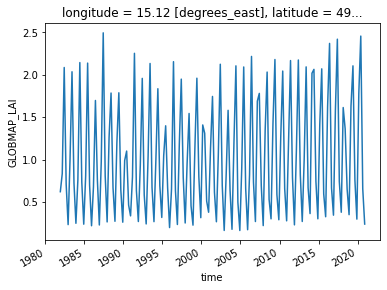

In [3]:
aggregated_temp = aggregate_seasons(temp_data)
aggregated_tp = aggregate_seasons(tp_data)
aggregated_ssrd = aggregate_seasons(ssrd_data)
aggregated_swvlall = aggregate_seasons(swvlall_data)
aggregated_lai = aggregate_seasons(lai_data)
aggregated_vpd = aggregate_seasons(vpd_data)


aggregated_lai["GLOBMAP_LAI"][:, 100, 100].plot()

Function detrend Took 0.0977 seconds
Function detrend Took 0.0608 seconds
Function detrend Took 0.0726 seconds
Function detrend Took 0.0821 seconds
Function detrend Took 0.0828 seconds
Function detrend Took 0.0866 seconds
Function detrend Took 0.0750 seconds
Function detrend Took 0.0803 seconds
Function detrend Took 0.0806 seconds
Function detrend Took 0.0799 seconds
Function detrend Took 0.0706 seconds
Function detrend Took 0.0814 seconds
Function detrend Took 0.1936 seconds
Function detrend Took 0.2300 seconds
Function detrend Took 0.2243 seconds
Function detrend Took 0.2058 seconds


/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])


Function detrend Took 0.3722 seconds


/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])


Function detrend Took 0.3119 seconds


/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])


Function detrend Took 0.3105 seconds
Function detrend Took 0.3079 seconds
Function detrend Took 0.0641 seconds
Function detrend Took 0.0715 seconds
Function detrend Took 0.0558 seconds
Function detrend Took 0.0817 seconds


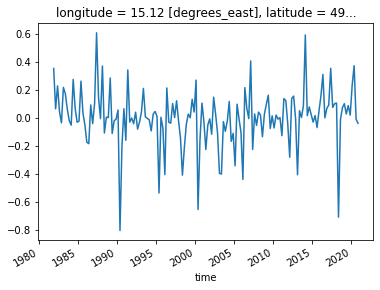

In [7]:
detrended_temp = detrend_seasons(aggregated_temp, deg=1, var="t2m")
detrended_tp = detrend_seasons(aggregated_tp, deg=1, var="tp")
detrended_ssrd = detrend_seasons(aggregated_ssrd, deg=1, var="ssrd")
detrended_swvlall = detrend_seasons(aggregated_swvlall, deg=1, var="swvlall")
detrended_lai = detrend_seasons(aggregated_lai, deg=1, var="GLOBMAP_LAI")
detrended_vpd = detrend_seasons(aggregated_vpd, deg=1, var="vpd_cf")

detrended_lai[:, 100, 100].plot()

/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/envs/pcv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/

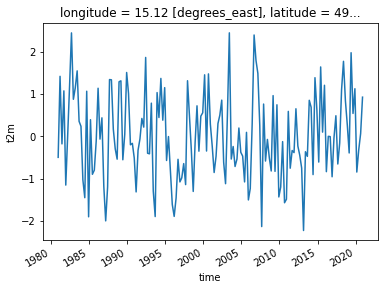

In [9]:
detrended_temp.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_temp.nc")
detrended_tp.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_tp.nc")
detrended_ssrd.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_ssrd.nc")
detrended_swvlall.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_swvlall.nc")
detrended_lai.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_lai.nc")
detrended_vpd.to_netcdf("/Users/anand/Documents/data/project_3_data/data/aggregated_vpd.nc")